In [1]:
from sklearn.datasets import make_moons

data, labels = make_moons(n_samples=200, shuffle=True, noise=0.05)

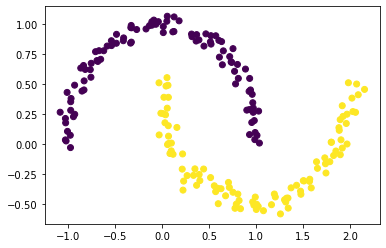

In [2]:
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], c=labels)

In [3]:
import pandas as pd

X = pd.DataFrame(data, columns=["x", "y"])
y = pd.Series(labels)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Regresja logistyczna

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

accuracy_score(y_test, y_pred)

0.8484848484848485

## Drzewo decyzyjne

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model_dt = DecisionTreeClassifier()
param_grid = {"max_depth": [2, 5, 8, 12], "criterion": ["gini", "entropy"]}

gs = GridSearchCV(model_dt, param_grid, cv=5)

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)

accuracy_score(y_test, y_pred)

0.9848484848484849

In [8]:
gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5)

## Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

models = [GaussianNB(), BernoulliNB()]
scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    
scores

[0.8484848484848485, 0.7727272727272727]

## KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

## SVM

In [12]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', C=2)
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)

accuracy_score(y_test, y_pred)

1.0